# **CAR PRICE PREDICTION 📊**

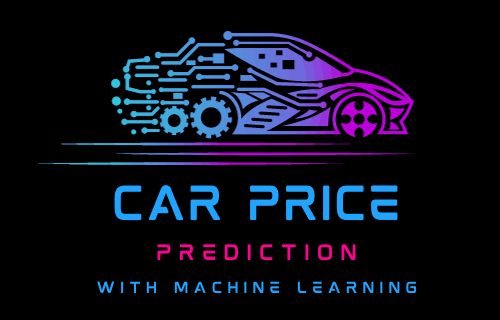

##**Problem Statement**

Car price prediction is a classic machine learning problem that involves predicting the price of a car based on various features such as its model, year, mileage, engine size, and other relevant attributes.
The objective is to create an accurate predictive model that can assist potential buyers and sellers in estimating the appropriate selling price for used cars. The model should be able to consider the various attributes of the cars and provide reliable price predictions 🚗😃


---



##**About the Dataset**

1.  Car_Name: Car model identifier.
2.  Year: Manufacturing year.
3.  Selling_Price: Price for sale.
4.  Present_Price: Current market value.
5.  Driven_kms: Kilometers driven.
6.  Fuel_Type: Type of fuel used.
7.  Selling_type: Method of sale.
8.  Transmission: Transmission type.
9.  Owner: Number of previous owners.


---





##**Data Exploration**

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
df = pd.read_csv('car.csv')

In [ ]:
# Checking the columns present in the data
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# Checking the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking the head of the data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Checking the size of the dataset
df.shape

(301, 9)

In [ ]:
# Checking for missing values in the dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

No missing values in the dataset.

---



##**Data Pre-Processing**




In [ ]:
# Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O' and feature != 'Car_Name']
num_cols = [feature for feature in df.columns if df[feature].dtypes != 'O']

# Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

Categorical columns: ['Fuel_Type', 'Selling_type', 'Transmission']


In [ ]:
# Finding the unique values in the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Fuel_Type:
Number of unique values in the Fuel_Type: 3
Unique values: ['Petrol' 'Diesel' 'CNG']


Selling_type:
Number of unique values in the Selling_type: 2
Unique values: ['Dealer' 'Individual']


Transmission:
Number of unique values in the Transmission: 2
Unique values: ['Manual' 'Automatic']




In [ ]:
#Checking the distribution of categorical data
print('Fuel Type Distribution:')
print(df.Fuel_Type.value_counts())
print('\nSelling Type Distribution:')
print(df.Selling_type.value_counts())
print('\nTransmission Distribution:')
print(df.Transmission.value_counts())

Fuel Type Distribution:
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Selling Type Distribution:
Dealer        195
Individual    106
Name: Selling_type, dtype: int64

Transmission Distribution:
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#Encoding the categorical data
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


##**Data Visualization**

<ipython-input-13-872590cbca33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


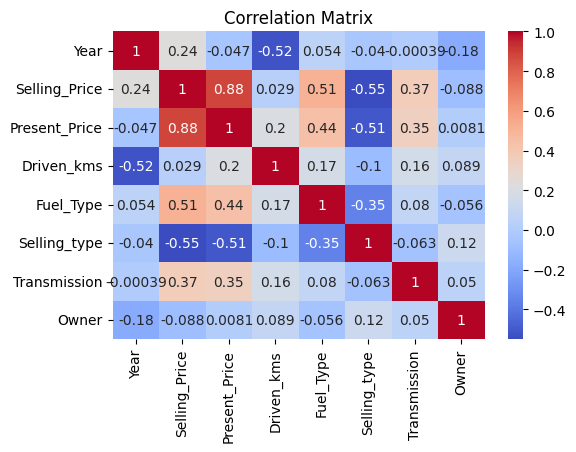

In [ ]:
# Correlation analysis of the data
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###**Visualizing the Numerical Features**


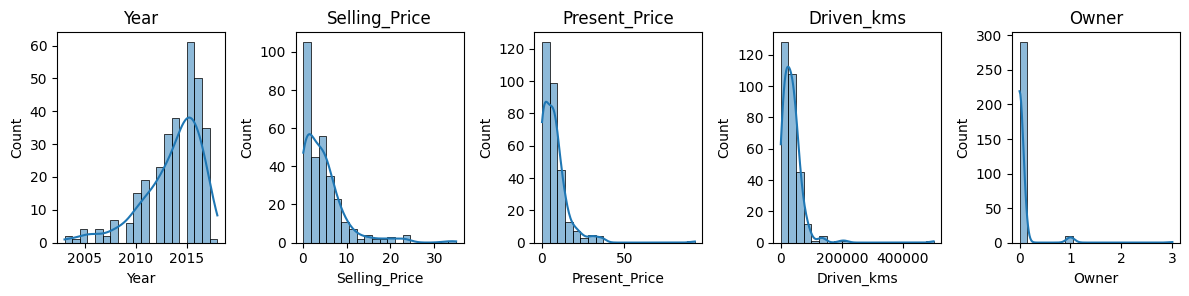

In [ ]:
plt.figure(figsize=(12, 8))
for feature in num_cols:
    plt.subplot(3, 5, num_cols.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

###**Visualizing the Categorical Features**


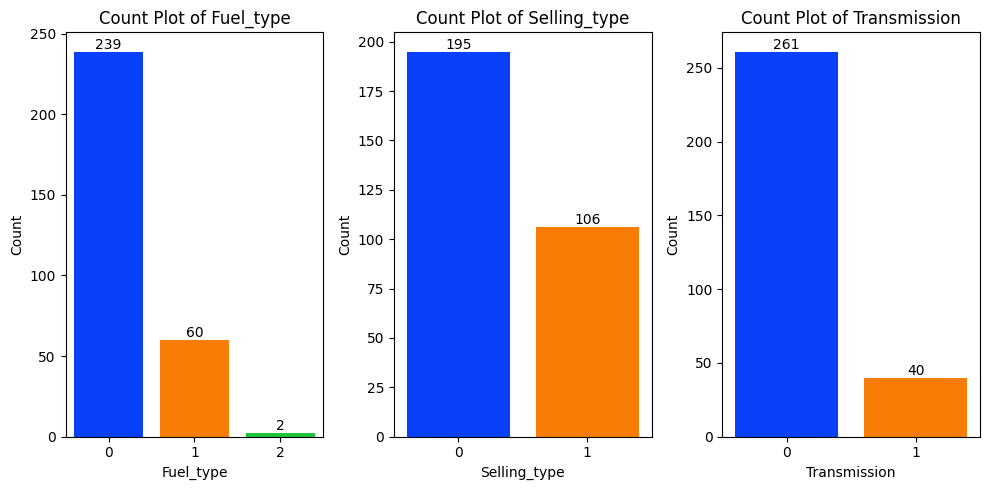

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Loop through each categorical column
for i, column in enumerate(cat_cols):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

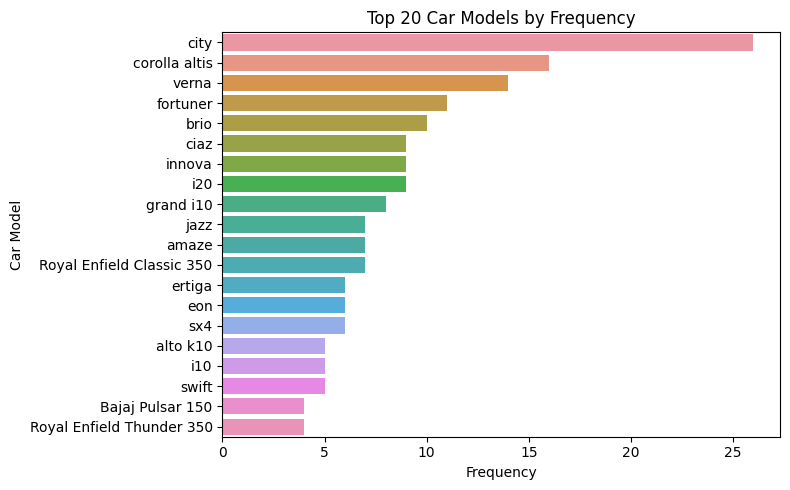

In [ ]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

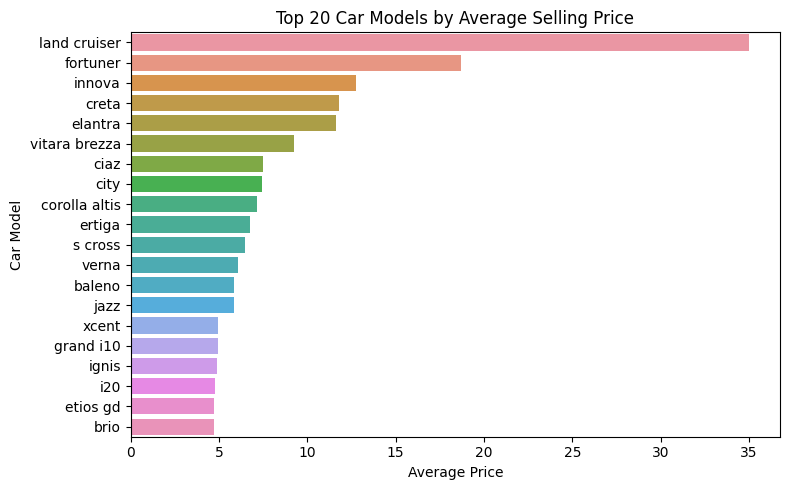

In [ ]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Selling Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

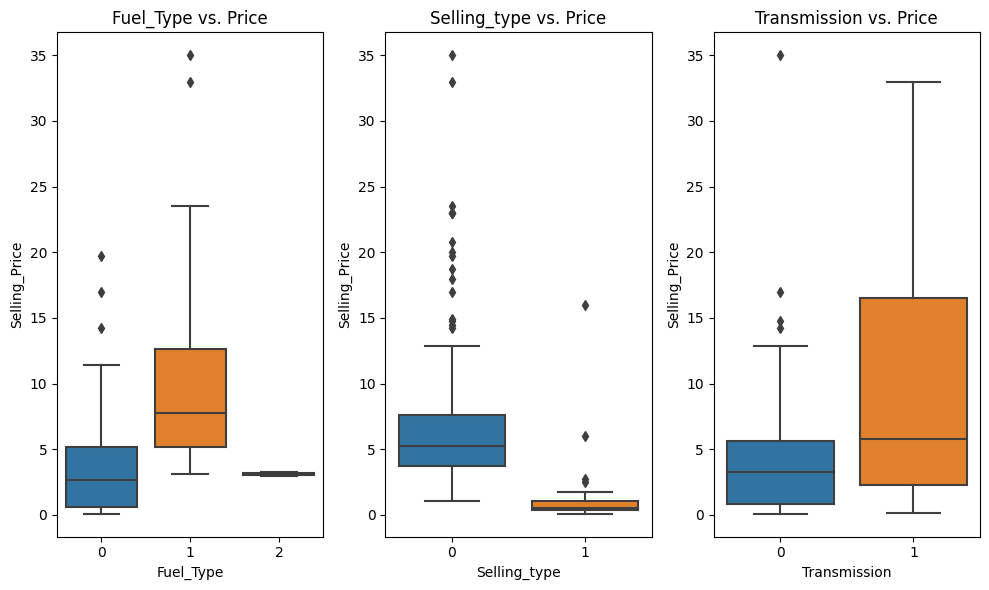

In [ ]:
# Categorical Feature vs. Price
plt.figure(figsize=(10, 6))
for feature in cat_cols:
    plt.subplot(1, 3, cat_cols.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Selling_Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

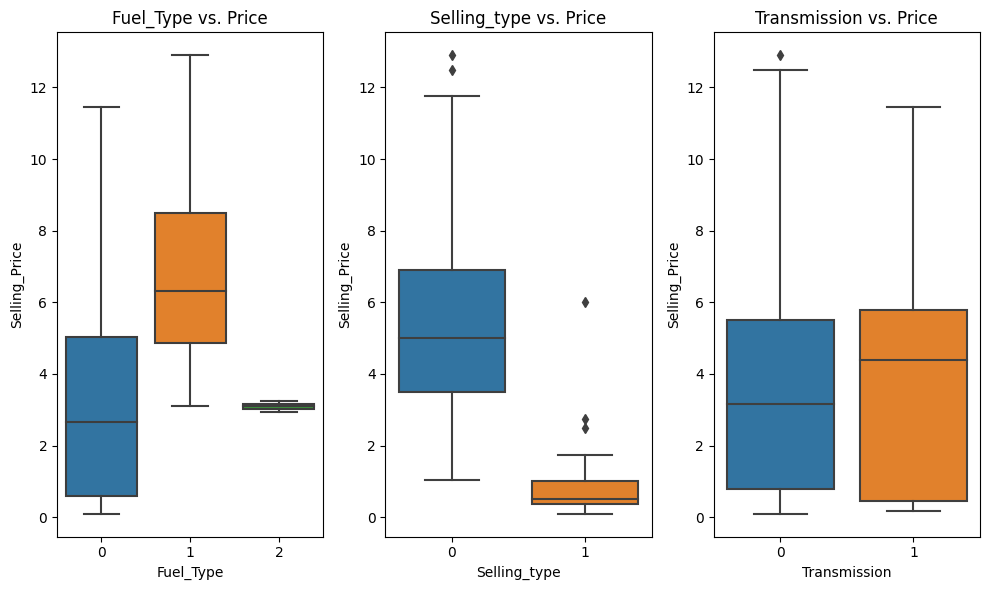

In [ ]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Categorical Feature vs. Price with outliers removed
plt.figure(figsize=(10, 6))
for feature in cat_cols:
    plt.subplot(1, 3, cat_cols.index(feature) + 1)

    # Remove outliers based on 'Selling_Price'
    df_no_outliers = remove_outliers(df, 'Selling_Price')

    sns.boxplot(data=df_no_outliers, x=feature, y='Selling_Price')
    plt.title(f'{feature} vs. Price')

plt.tight_layout()
plt.show()


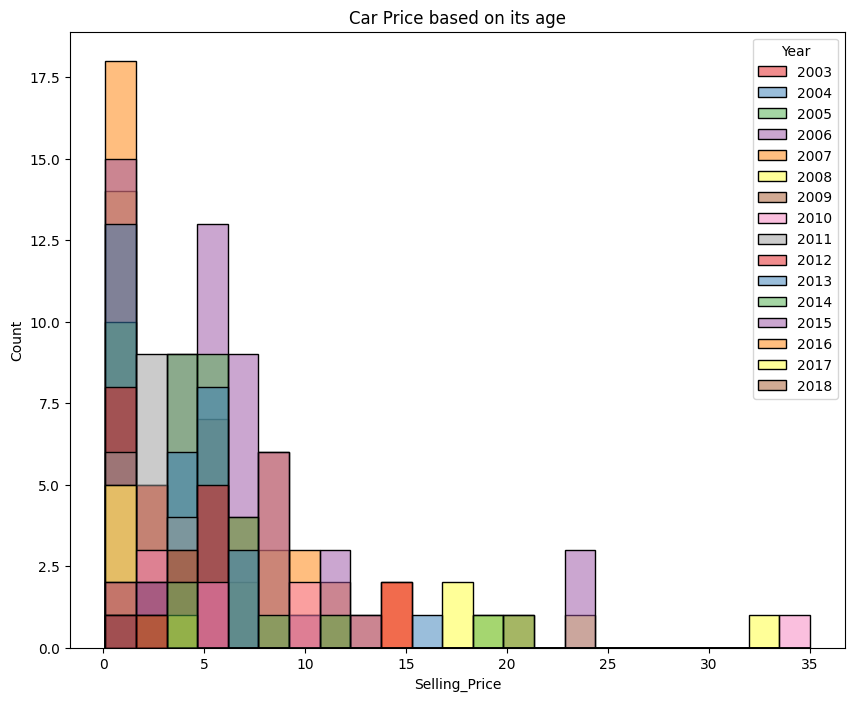

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Car Price based on its age")
sns.histplot(x="Selling_Price", hue="Year", data=df, palette='Set1')
plt.show()

##**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['Car_Name','Selling_Price'], axis=1)
y = df['Selling_Price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

# Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)


##**Model Evaluation**

In [ ]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')

print("Linear Regression:")
evaluate_model("Linear Regression", y_test, y_pred_linear)

print("\nRandom Forest Regression:")
evaluate_model("Random Forest Regression", y_test, y_pred_rf)

print("\nGradient Boosting Regression:")
evaluate_model("Gradient Boosting Regression", y_test, y_pred_gb)


Linear Regression:
Mean Squared Error: 3.53
R-squared: 0.85

Random Forest Regression:
Mean Squared Error: 0.87
R-squared: 0.96

Gradient Boosting Regression:
Mean Squared Error: 0.82
R-squared: 0.96


**Since we know that a lower MSE and and values of R^2 closer to 1 determine the best fit, the most suitable Machine Learning algorithm to predict Car Prices using the given features is---------->**
# **"Gradient Boosting Regression"**

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_gb,'Difference':y_test-y_pred_gb})
pred_df

,Actual Value,Predicted Value,Difference
177,0.35,0.608931,-0.258931
289,10.11,10.600770,-0.490770
228,4.95,4.753172,0.196828
198,0.15,0.271438,-0.121438
60,6.95,8.088840,-1.138840
...,...,...,...
234,5.50,4.789228,0.710772
296,9.50,9.460733,0.039267
281,2.10,2.544194,-0.444194
285,7.40,7.391954,0.008046


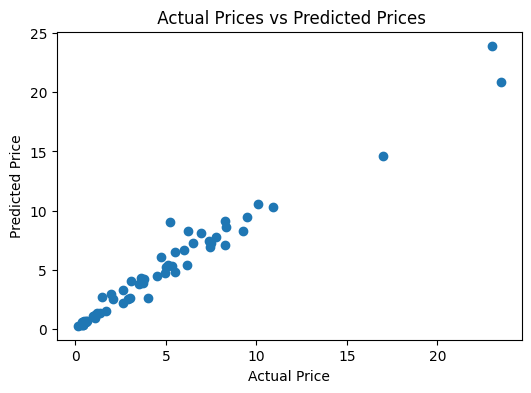

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_gb)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##**Model Testing**

In [ ]:
# Testing the model using Gradient Boosting Regressor

# Define the input features for prediction
# You should provide values for 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', and 'Owner'
input_features = {
    'Year': 2009,
    'Present_Price': 9,
    'Driven_kms': 60000,
    'Fuel_Type': 0,  # Replace with 0 (Petrol), 1 (Diesel) or 2 (CNG) based on the fuel type
    'Selling_type': 0,  # Replace with 0 (Dealer) or 1 (Individual) based on the selling type
    'Transmission': 0,  # Replace with 0 (Manual) or 1 (Automatic)  based on the transmission type
    'Owner': 0
}

# Create a DataFrame with the input features
input_data = pd.DataFrame([input_features])

# Make predictions
predicted_price = gb_regressor.predict(input_data)
print(f"Predicted Selling Price: {predicted_price[0]:.2f}")


Predicted Selling Price: 2.99
